# Handling missing values

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### The NaN value
Pandas represents missing data with NaN, which stands for 'Not a Number'. This is a special floating-point value from NumPy. We can perform operations with NaN values without resulting in errors, but the result of any operations with a NaN value will be another NaN value. Try out the following

In [5]:
np.nan
#nan
np.nan+2
#nan
np.nan*0
#nan

nan

Pandas has several built-in functions that helps us detect, remove and replace NaN values such as

- isnull()
- notnull()
- dropna()
- fillna()

#### Detecting missing values


In [6]:
df.isnull()[0:10]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Dropping missing values

In [8]:
df2=df.dropna()

In [9]:
df2.isnull().sum().sum()

0

In [10]:
df.shape

(4803, 20)

In [11]:
df2.shape

(1493, 20)

**Indeed, a very big chunk of the data was removed,** so this is not very useful. We could instead opt to drop a row only if all the values in the row are NaN. We can do this by including the how='all'argument. Try this out:

In [12]:
df3 = df.dropna(how='all')
df3.shape
#(4803, 20)

(4803, 20)

In [13]:
df.dropna(axis=1);

then the two columns with lots of NaN values are dropped, but we also lose columns with only one, two or three NaN values, which ideally we would like to keep. On the other hand, if we use

In [14]:
df.dropna(how='all', axis=1);

Then as with the rows, no columns are dropped, and the DataFrame is unchanged. Pandas has a solution for this problem: with the parameter thresh, which allows us to mention a minimum number of non-null values for the row/column to be kept! Let's try this out:

In [15]:
df.dropna(thresh=4000, axis=1, inplace=True)

In [16]:
df.isnull().sum().sum()

6

If we take a look at the resulting DataFrame, we will notice that columns homepage and tagline were dropped, since they both contained less then 4000 non-null values. This actually removes almost all of our NaN without dropping an excessive number of rows or columns:

#### Replacing missing values
Dropping missing data decreases the number of samples in our data set and as a result the power of our analysis and the predictive strength for our machine learning models. Therefore it is preferable to first try to retain data by suitably replacing missing values before using dropna() as a last resort.

epending on the data there are multiple strategies to replace missing values. If we actually know the correct values or might be able to provide an argument for a reasonable value, we can correct them directly. Otherwise, we aim to infer or estimate the missing data points suitably. **For this, we might use methods like ffill, an estimate like the mean or use machine learning models like k-NN (see later).**

Pandas has a **function fillna()** that helps us replace missing values with some specific value that we can choose. Let's look once again where our missing data is:

In [17]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [18]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [19]:
df['release_date'].head(5)

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [20]:
df['runtime'].head(5)

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [21]:
df['runtime'][0:5]

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [22]:
df['overview'].fillna(value='Overview not available', inplace=True)

In [23]:
df['overview'].isnull().sum()

0

Next, for the column 'release_date', we will be replacing the missing data by propagating the non-missing values, meaning that we replace the missing data with the closest non-missing value (in the same column) in either the forward or backward direction. The function fillna() allows us to do this with two parameters:

- ffill: for forward propagation
- bfill: for backward propagation

In [24]:
df.loc[df['release_date'].isnull(), 'release_date']

4553    NaN
Name: release_date, dtype: object

In [25]:
df.loc[4552:4554, 'release_date']  

4552    2012-03-28
4553           NaN
4554    2015-03-10
Name: release_date, dtype: object

In [26]:
df['release_date'].fillna(method='ffill')[4552:4555]

4552    2012-03-28
4553    2012-03-28
4554    2015-03-10
Name: release_date, dtype: object

In [27]:
df['release_date'].fillna(method='bfill')[4552:4555]

4552    2012-03-28
4553    2015-03-10
4554    2015-03-10
Name: release_date, dtype: object

In [28]:
df['runtime'].mean()


106.87585919600083

In [29]:
df['runtime'].fillna(value=df['runtime'].mean(), inplace=True)

In [30]:
df.isnull().sum().sum()

1

# Removing duplicate values


In [31]:
import pandas as pd
df =  pd.DataFrame({ 'color': ['blue','blue','red','red','blue'], 'value': [2,1,3,3,2]})

In [32]:
df

,color,value
0,blue,2
1,blue,1
2,red,3
3,red,3
4,blue,2


In [33]:
df.duplicated()


0    False
1    False
2    False
3     True
4     True
dtype: bool

In [34]:
df.duplicated(keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [35]:
df.duplicated(keep=False)

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [36]:
df.loc[df.duplicated(),:]

,color,value
3,red,3
4,blue,2


In [37]:
df.drop_duplicates()

,color,value
0,blue,2
1,blue,1
2,red,3


In [38]:
df.drop_duplicates(keep='last')

,color,value
1,blue,1
3,red,3
4,blue,2


#### Duplicates from a particular column

In [39]:
df.drop_duplicates(['value'])

,color,value
0,blue,2
1,blue,1
2,red,3


In [40]:
df.drop_duplicates(['color'])

,color,value
0,blue,2
2,red,3


In [41]:
import pandas as pd
df = pd.read_csv('http://bit.ly/chiporders',sep='\t')

In [42]:
df[-8:]

,order_id,quantity,item_name,choice_description,item_price
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [43]:
df.duplicated().sum()

59

In [44]:
df.duplicated(['order_id']).sum()

2788

In [45]:
df.duplicated(['quantity']).sum()

4613

In [46]:
df.duplicated(['item_name']).sum()

4572

In [47]:
df.duplicated(['choice_description']).sum()

3578

In [48]:
df.duplicated(['item_price']).sum()

4544

In [49]:
for column in df.columns:
    x=df.duplicated([column]).sum()
    print(x)

2788
4613
4572
3578
4544


In [50]:
df.duplicated(['order_id','item_name','item_price']).sum()

249

In [51]:
df.drop_duplicates(['order_id','item_name','item_price'], keep = False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4156 entries, 0 to 4619
Data columns (total 5 columns):
order_id              4156 non-null int64
quantity              4156 non-null int64
item_name             4156 non-null object
choice_description    2946 non-null object
item_price            4156 non-null object
dtypes: int64(2), object(3)
memory usage: 194.8+ KB


# Detecting and filtering outliers

In order to identify outlier candidates, we need to:

1) establish what we consider as 'normal

2) find a way to measure deviations from that 'normal'.

Outliers vs errors :

Some abnormal values can be the result of errors in the data and should be addressed in any case. Unlike errors, we consider outliers as legitimate values that are different or rare. When we discuss outliers below and in other units, we will assume that we have already cleared out the errors.

**Outliers can hold valuable information**

Outliers are often seen as abnormal and undesirable. However, in some fields, they can provide sought-after insights.

- Recognizing outliers in user behavior can help credit card firms identify potential fraud and network administrators identify attempted cyber attacks.
- In production cycles, outliers can help identify defective products that should not enter circulation.
- In predictive maintenance, outliers in time-series data for sensors and machines can be signs of imminent problems and a potential breakdown. Recognizing this early allows firms to intervene quickly and save time and money.
- **In science, outliers might give rise to unobserved phenomena (novelties) that advance our understanding of the field and down the line, the outlier in today's observational data becomes a standard part of tomorrow's textbooks.**

#### Practical outlier removal


In this unit, we will describe three methods for outlier detection and removal: by **inspection, z-scores and boxplots**. Here we will focus on outliers within single features.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We will work with a data set of 100'000 randomly generated samples with 6 features.
The first 5 features are created with the random.randn() function from NumPy. This function creates an array of specified shape (here 100'000 by 5) and uses a random number generator to fill this array with random values sampled from the standard normal (Gaussian) distribution. Concretely, as the documentation of the function states, it will return the array "filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1".

For the 5th feature, we will **manually introduce outliers** by adding 1000 to the last 100 values (i.e. 0.1% of our samples).
Finally, we will add a 6th feature with values sampled from an exponential distribution as an illustrative example that exhibits skewness. You don't need to worry about the details, but if you want to know more see the numpy documentation which has further references at the end.

In [54]:
# Create a random seed to make result reproducible
np.random.seed(0)


In [55]:
# Create 5 features with 100000 samples from Gaussian distribution each
df = pd.DataFrame(np.random.randn(100000, 5))

In [57]:
df[0:5]

,0,1,2,3,4
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755


In [58]:
# Add 1000 to the last 100 values of feature 4
df.iloc[-100:, 4] = df.iloc[-100:, 4] + 1000

In [59]:
# Create 6th feature with 100000 samples from exponential distribution
df[5] = np.random.exponential(1, 100000)

In [60]:
# Change feature names
df = df.add_prefix("X")
df.head()

,X0,X1,X2,X3,X4,X5
0,1.764052,0.400157,0.978738,2.240893,1.867558,0.540426
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599,1.424513
2,0.144044,1.454274,0.761038,0.121675,0.443863,0.282623
3,0.333674,1.494079,-0.205158,0.313068,-0.854096,0.038750
4,-2.552990,0.653619,0.864436,-0.742165,2.269755,0.999036


#### Checking descriptive statistics and visualizations

In [62]:
df.describe().round(5)

,X0,X1,X2,X3,X4,X5
count,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000
mean,-0.00020,0.00235,0.00161,0.00196,1.00745,1.00622
std,0.99711,0.99915,1.00225,1.00057,31.61742,1.00696
min,-4.69459,-4.85212,-4.24712,-4.44663,-5.00230,0.00000
25%,-0.67891,-0.66917,-0.67574,-0.67561,-0.66450,0.29055
50%,0.00263,0.00315,0.00039,0.00118,0.00851,0.69563
75%,0.67424,0.67192,0.67740,0.67603,0.68245,1.39619
max,4.46661,4.22408,4.28586,4.24177,1002.53804,11.80068


For feature X4 the minimum, the median, and the 25th and 75th percentile are very similar to those of features X0 to X3. However the mean, standard deviation, and maximum are different.

*Comment: Accounting for the fact that we added 1000 to the last 100 samples the shift of the maximum was to be expected. But observe how these 100 samples have also influenced the mean and, in particular, the standard deviation (31.6 instead of ~1). We highlight this because this will have a significant impact on the outliers detected for X4 with the z-score method below.*

Finally for feature X5, we have a mean and std of 1 and the median is around two thirds between the minimum and the mean. Moreover, the minimum is 1 std away from the mean while the maximum is almost 11 std away from the mean. This suggests the data is right-skewed, i.e a longer tail on the right. We will need to take a closer look.

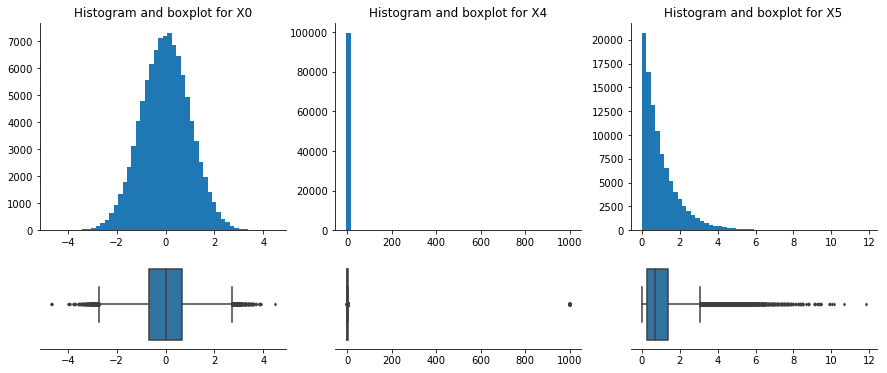

In [64]:
fig, axes = plt.subplots(
    2, 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    ["X0", "X4", "X5"], [0, 1, 2]  # pairing feature with column in plot
):
    axes[0, plot_col].hist(df[feat], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feat], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()